In [2]:
#Imports

from control.matlab import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.integrate

8.1

In [3]:
#Question 8.1_intro_1

s = tf([1,0], [1])

G = tf([6205],[1, 14, 1281, 0])

Heq = (G).feedback(1)

tau = 1/5
omega = np.sqrt(1241)
zeta = 4/omega

H1 = tf([1/tau], [1, 1/tau])
H2 = tf([omega*omega], [1, 2*zeta*omega, omega*omega])

print(H1*H2)
print(Heq)

t = np.arange(0, 2.01, 0.01)

y1, t1 = step(H1, t)
y2, t2 = step(H2, t)
yeq, teq = step(Heq, t)

D1 = scipy.integrate.trapezoid((abs(yeq -y1)), t)
D2 = scipy.integrate.trapezoid((abs(yeq - y2)), t)

print(D1)
print(D2)




            6205
----------------------------
s^3 + 13 s^2 + 1281 s + 6205


            6205
----------------------------
s^3 + 14 s^2 + 1281 s + 6205

0.020992218275880964
0.21771021602786514


8.2

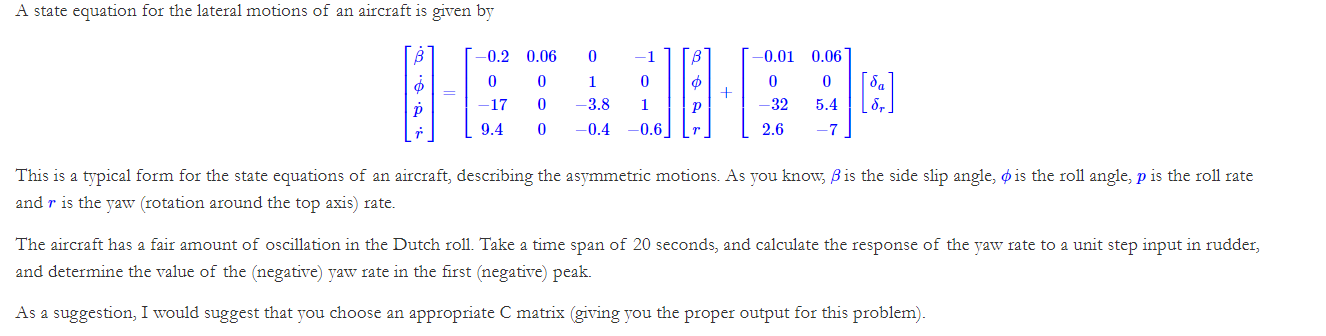

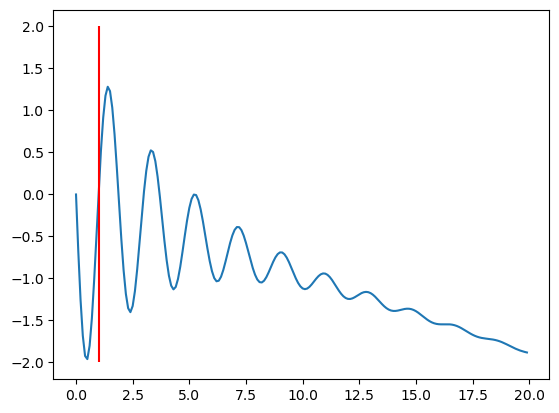

In [4]:
#Question 8.2_control_1

A = np.matrix([[-0.2, 0.06, 0.0, -1.0], [0.0, 0.0, 1.0, 0.0], [-17.0, 0.0, -3.8, 1.0], [9.4, 0.0, -0.4, -0.6]])

B = np.matrix([[0.06], [0], [5.4], [-7]])

C = np.matrix([0.0, 0.0, 0.0, 1.0])

D = np.matrix([0.0])

t = np.arange(0, 20, 0.1)

sys1 = ss(A,B,C,D)

r1, t = step(sys1, t)

plt.figure()
plt.plot(t, r1.ravel())
plt.vlines(1, -2, 2, color = "red")
plt.show()



In [5]:
#Question 8.2_control_2


A = np.matrix([[-0.2, 0.06, 0.0, -1.0], [0.0, 0.0, 1.0, 0.0], [-17.0, 0.0, -3.8, 1.0], [9.4, 0.0, -0.4, -0.6]])

B = np.matrix([[-0.01, 0.06], [0.0, 0.0], [-32.0, 5.4], [2.6, -7]])

C = np.matrix([[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]])

D = np.matrix([[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]])

sys2 = ss(A,B,C,D)

print(sys2)

Kd = -0.55

G = np.matrix([[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, Kd]])

sys3 = sys2.feedback(G)

print(sys3)



<LinearIOSystem>: sys[16]
Inputs (2): ['u[0]', 'u[1]']
Outputs (4): ['y[0]', 'y[1]', 'y[2]', 'y[3]']
States (4): ['x[0]', 'x[1]', 'x[2]', 'x[3]']

A = [[ -0.2    0.06   0.    -1.  ]
     [  0.     0.     1.     0.  ]
     [-17.     0.    -3.8    1.  ]
     [  9.4    0.    -0.4   -0.6 ]]

B = [[-1.0e-02  6.0e-02]
     [ 0.0e+00  0.0e+00]
     [-3.2e+01  5.4e+00]
     [ 2.6e+00 -7.0e+00]]

C = [[1. 0. 0. 0.]
     [0. 1. 0. 0.]
     [0. 0. 1. 0.]
     [0. 0. 0. 1.]]

D = [[0. 0.]
     [0. 0.]
     [0. 0.]
     [0. 0.]]

<LinearICSystem>: sys[18]
Inputs (2): ['u[0]', 'u[1]']
Outputs (4): ['y[0]', 'y[1]', 'y[2]', 'y[3]']
States (4): ['sys[16]_x[0]', 'sys[16]_x[1]', 'sys[16]_x[2]', 'sys[16]_x[3]']

A = [[ -0.2     0.06    0.     -0.967]
     [  0.      0.      1.      0.   ]
     [-17.      0.     -3.8     3.97 ]
     [  9.4     0.     -0.4    -4.45 ]]

B = [[-1.0e-02  6.0e-02]
     [ 0.0e+00  0.0e+00]
     [-3.2e+01  5.4e+00]
     [ 2.6e+00 -7.0e+00]]

C = [[1. 0. 0. 0.]
     [0. 1. 0. 0.]


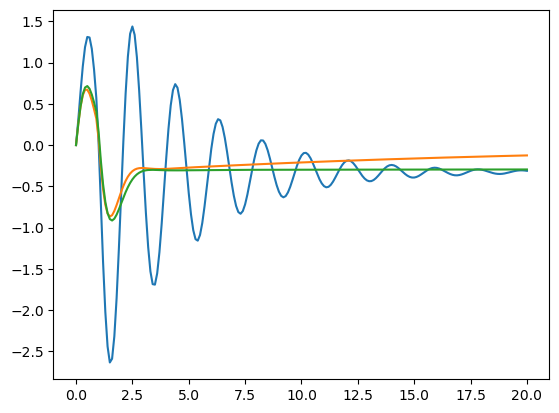

_____Eigenvalue______ Damping___ Frequency_
    -4.074                     1      4.074
   -0.2625    +3.278j    0.07983      3.289
   -0.2625    -3.278j    0.07983      3.289
 -0.001089                     1   0.001089
(array([4.07381994e+00, 3.28874827e+00, 3.28874827e+00, 1.08937685e-03]), array([1.        , 0.07983139, 0.07983139, 1.        ]), array([-4.07381994e+00+0.j        , -2.62545342e-01+3.27825184j,
       -2.62545342e-01-3.27825184j, -1.08937685e-03+0.j        ]))
_____Eigenvalue______ Damping___ Frequency_
    -3.947                     1      3.947
    -2.225    +2.506j      0.664      3.352
    -2.225    -2.506j      0.664      3.352
  -0.05187                     1    0.05187
(array([3.94738576, 3.35162606, 3.35162606, 0.05186711]), array([1.        , 0.66396833, 0.66396833, 1.        ]), array([-3.94738576+0.j        , -2.22537356+2.50621423j,
       -2.22537356-2.50621423j, -0.05186711+0.j        ]))
[-0.31211111]
[0.25410122]
[-0.29548869]


In [6]:
#Question 8.3_control_3
Kr = -0.55


#For only yaw rate output

A = np.matrix([[-0.2, 0.06, 0.0, -1.0], [0.0, 0.0, 1.0, 0.0], [-17.0, 0.0, -3.8, 1.0], [9.4, 0.0, -0.4, -0.6]])

B = np.matrix([[-0.01, 0.06], [0.0, 0.0], [-32.0, 5.4], [2.6, -7]])

C = np.matrix([0.0, 0.0, 0.0, 1.0])

D = np.matrix([0.0, 0.0])

sys_base = ss(A,B,C,D)

Kd = -0.55
G = np.matrix([[0], [Kd]])
sys_feedback = sys_base.feedback(G)


# feedback system for washout yaw damper
A_fb = np.mat([[-0.5]])
B_fb = np.mat([[0.5]])
C_fb = np.mat([[0], [-Kr]])
D_fb = np.mat([[0], [Kr]])
K_wash = ss(A_fb, B_fb, C_fb, D_fb)

sys_wash = sys_base.feedback(K_wash)


#time vector 
t = np.arange(0, 20.1, 0.1)

#input vector
u = np.zeros((t.size, 2))
u[:10,0] = 1.0

y_base, t, x0 = lsim(sys_base, u, t)
y_feedback, t, x0 = lsim(sys_feedback, u, t)
y_wash, t, x0 = lsim(sys_wash, u, t)

plt.figure()
plt.plot(t, y_base)
plt.plot(t, y_feedback)
plt.plot(t, y_wash)
plt.show()

print(damp(sys_base))
print(damp(sys_feedback))
print(y_base[-1])
print(y_feedback[1])
print(y_wash[-1])



8.3

In [7]:
Ks = 2

s = tf([1,0], [1])
H1 = Ks*s/s
H2 = 1/(s*s)
H3 = tf([40], [1, 12, 40])
H4 = 1*s/s
H5 = 1*s
H6 = 1*s/s
#H6 is added due to the extra input being added into the system

H = append(H1, H2, H3, H4, H5, H6)
#These indices are used as references in Q


#Every row is a transfer function
#Every connection is a column
#TF 1 receives +4 and +5
#TF 2 receives +1 and +6
Q = np.matrix([[1, 4, 5],[2, 1, 6], [3, 2, 0], [4,3,0], [5,3,0]])  

#now do inputs and outputs

inputs = np.matrix([1, 6])  #There is an input into 1 and and input into tf 6

outputs = np.matrix([2]) #Output comes out of transfer function 2

sys = connect(H, Q, inputs, outputs)

print(sys)


ValueError: Transfer function is non-proper; can't convert to StateSpace system.

In [1]:
s = tf([1,0], [1])

Ka = 4
tau = 1.4
Kap = 0.2

H1 = Kap*s/s
H2 = tf([9], [1, 5, 9])
H3 = Ka/(s*(tau*s + 1))
H4 = s/s

H = append(H1, H2, H3, H4)
#These indices are used as references in Q


#Every row is a transfer function
#Every connection is a column
#TF 1 receives +4 and +5
#TF 2 receives +1 and +6
Q = np.matrix([[1, -4, 0],[2, 1, 0], [3, 2, 0], [4,3,0]])  

#now do inputs and outputs

inputs = [1]  #There is an input into 1 and and input into tf 6

outputs = [3] #Output comes out of transfer function 2

sys = connect(H, Q, inputs, outputs)

sys = tf(sys)

print(sys)



NameError: name 'tf' is not defined

In [11]:


K = 0.8


H1 = 1/((s*s)*(s*s + s + 4))
H2 = K*(4*s*s + 2*s + 1)/(s + 0.1*s*s)

H = append(H1, H2)

Q = [[1, 2],
    [2, -1]]

inputs = [2]
outputs = [1, 2]

sys = connect(H, Q, inputs, outputs)
print(sys)

A = [[-1.00000000e+00  4.00000000e+00  0.00000000e+00 -3.20000000e+01
      -3.04000000e+01 -8.00000000e-01]
     [-1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
       0.00000000e+00  0.00000000e+00]
     [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
       0.00000000e+00  0.00000000e+00]
     [ 0.00000000e+00  0.00000000e+00 -1.00000000e+00  0.00000000e+00
       0.00000000e+00  0.00000000e+00]
     [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.00000000e+01
      -1.00000000e+01  5.55111512e-17]
     [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
      -1.00000000e+00 -1.52655666e-16]]

B = [[-32.]
     [  0.]
     [  0.]
     [  0.]
     [-10.]
     [  0.]]

C = [[ 0.   0.   0.  31.  30.4  0.8]]

D = [[32.]]

